# Data pre-processing

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import datasets
from datasets import load_dataset

# Load dataset
dataset = load_dataset("imdb")
df = dataset["train"].to_pandas()
print(df.head(5))  # Display first few rows

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0


In [ ]:
print(df.tail(15))

                                                    text  label
24985  Normally, I don't watch action movies because ...      1
24986  David Duchovny plays the lead role in this fil...      1
24987  I enjoyed this movie. Unlike like some of the ...      1
24988  This film has a lot of raw potential. The scri...      1
24989  David Duchovney creates a role that he was to ...      1
24990  Like I said its a hidden surprise. It well wri...      1
24991  I'd always wanted David Duchovney to go into t...      1
24992  This movie really kicked some ass. I watched i...      1
24993  With the mixed reviews this got I wasn't expec...      1
24994  Very smart, sometimes shocking, I just love it...      1
24995  A hit at the time but now better categorised a...      1
24996  I love this movie like no other. Another time ...      1
24997  This film and it's sequel Barry Mckenzie holds...      1
24998  'The Adventures Of Barry McKenzie' started lif...      1
24999  The story centers around Barry Mc

In [ ]:
print(df.columns)

Index(['text', 'label'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
df.columns = ["review", "sentiment"]
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# Train/Test split
train_review, test_review, train_sentiment, test_sentiment = train_test_split(
    df["review"], df["sentiment"], test_size=0.2, random_state=42
)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_review)
X_test = vectorizer.transform(test_review)

print(f"Train samples: {len(train_review)}")
print(f"Test samples: {len(test_review)}")
print(f"TF-IDF matrix shape: {X_train.shape}")

Train samples: 20000
Test samples: 5000
TF-IDF matrix shape: (20000, 5000)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Train Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, train_sentiment)
nb_preds = nb_model.predict(X_test)

In [ ]:
# Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, train_sentiment)
svm_preds = svm_model.predict(X_test)

In [ ]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, train_sentiment)
log_preds = log_reg.predict(X_test)

Naïve Bayes Model Performance:
Accuracy: 0.8546
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2541
           1       0.85      0.85      0.85      2459

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



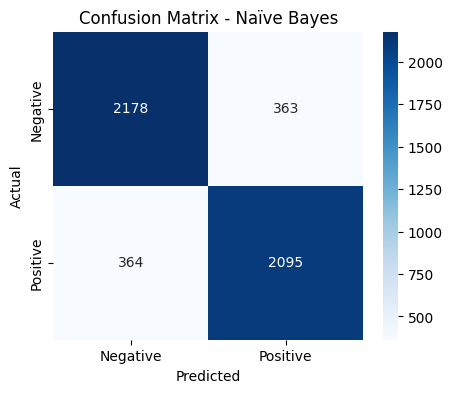

SVM Model Performance:
Accuracy: 0.8832
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2541
           1       0.87      0.89      0.88      2459

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



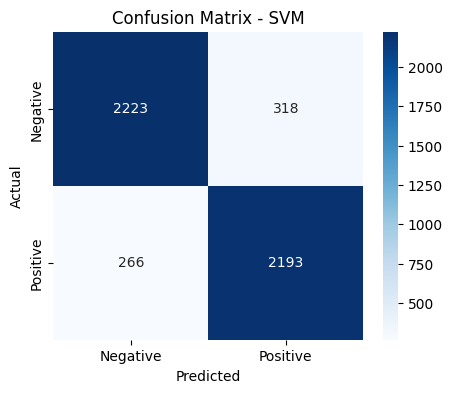

Logistic Regression Model Performance:
Accuracy: 0.884
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2541
           1       0.87      0.90      0.88      2459

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



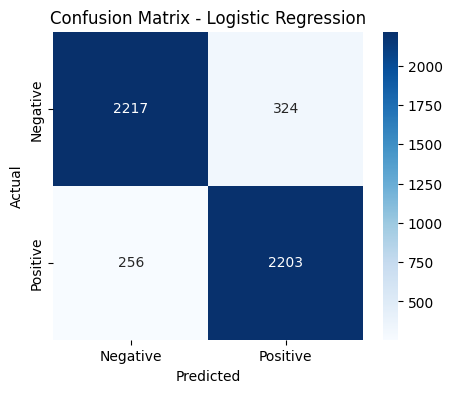

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluate models
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

evaluate_model("Naïve Bayes", test_sentiment, nb_preds)
evaluate_model("SVM", test_sentiment, svm_preds)
evaluate_model("Logistic Regression", test_sentiment, log_preds)

In [ ]:
import pandas as pd

# Collect model performance
results = {
    "Model": ["Naïve Bayes", "SVM", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(test_sentiment, nb_preds),
        accuracy_score(test_sentiment, svm_preds),
        accuracy_score(test_sentiment, log_preds),
    ]
}

# Display results
df_results = pd.DataFrame(results)
print(df_results)

                 Model  Accuracy
0          Naïve Bayes    0.8546
1                  SVM    0.8832
2  Logistic Regression    0.8840


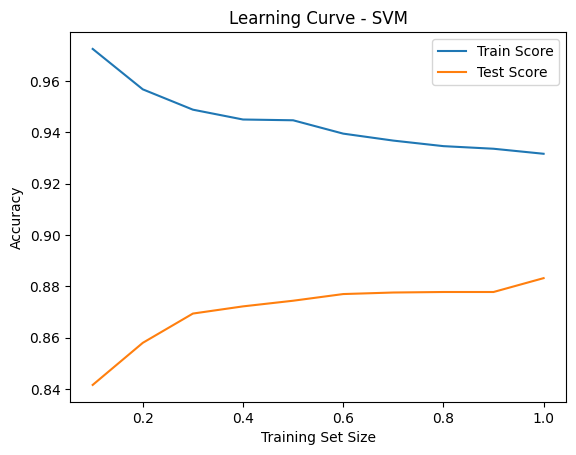

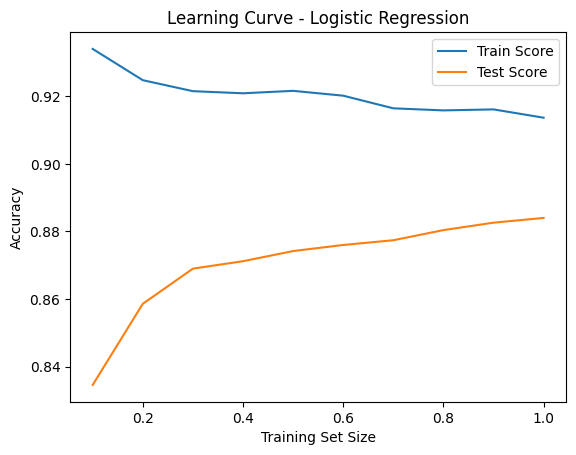

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot learning curve
def plot_learning_curve(model, X_train, y_train, X_test, y_test, model_name):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores, test_scores = [], []

    for size in train_sizes:
        subset_X, subset_y = X_train[:int(size * X_train.shape[0])], y_train[:int(size * y_train.shape[0])]
        model.fit(subset_X, subset_y)
        train_scores.append(model.score(subset_X, subset_y))
        test_scores.append(model.score(X_test, y_test))

    plt.plot(train_sizes, train_scores, label="Train Score")
    plt.plot(train_sizes, test_scores, label="Test Score")
    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Plot for SVM and Logistic Regression
plot_learning_curve(svm_model, X_train, train_sentiment, X_test, test_sentiment, "SVM")
plot_learning_curve(log_reg, X_train, train_sentiment, X_test, test_sentiment, "Logistic Regression")

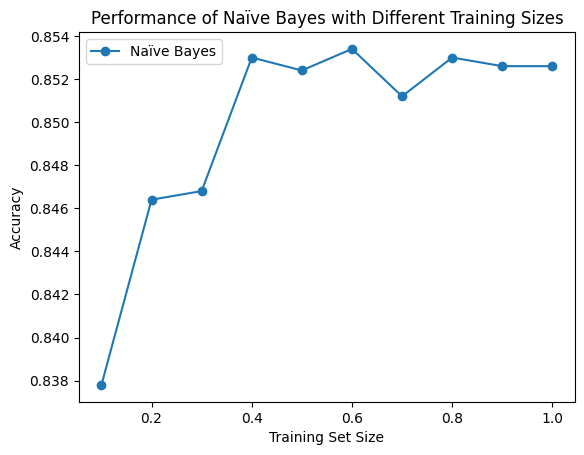

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
nb_scores = []

for size in train_sizes:
    subset_X, subset_y = X_train[:int(size * X_train.shape[0])], train_sentiment[:int(size * train_sentiment.shape[0])]
    nb_model.fit(subset_X, subset_y)
    nb_scores.append(nb_model.score(X_test, test_sentiment))

plt.plot(train_sizes, nb_scores, marker='o', label="Naïve Bayes")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Performance of Naïve Bayes with Different Training Sizes")
plt.legend()
plt.show()